In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#객체 생성
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
#datetime 인덱스와 레이블이 있는 열을 가지고 있는
#numpy 배열을 전달하여 데이터프레임을 만듦
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df=pd.DataFrame(np.random.randn(6,4),\
                index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.036970,1.294189,-0.251314,-1.554131
2013-01-02,-0.395428,-0.114746,-0.606038,0.538780
2013-01-03,1.137849,0.500585,-0.203553,-1.161859
2013-01-04,1.542884,-1.068534,-0.682257,0.353040
2013-01-05,-1.834895,0.539177,0.589943,0.473242
2013-01-06,-0.056583,-0.079690,-0.993883,1.960948


In [11]:
#dict로 구성된 데이터프레임 만듦

df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [12]:
#데이터프레임 결과물의 타입
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

W2. 3-5. Subset_Observation_(ROWS)

실습 3 Subset_observation(Rows)\
drop_duplicates()

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(
{'a': [4,5,6],
'b': [7,8,9],
'c': [10,11,12]},
index = pd.MultiIndex.from_tuples(
[('d',1),('d',2),('e',2)],
names = ['n','v']))
#multiindex.from_tuples: 튜플로 된 여러 개의 인덱스로 만든다.
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [5]:
df[df>7]

a    b   c
n v             
d 1 NaN  NaN  10
  2 NaN  8.0  11
e 2 NaN  9.0  12

In [6]:
df.b>7

n  v
d  1    False
   2     True
e  2     True
Name: b, dtype: bool

In [7]:
df[df.b>7]

,,a,b,c
n,v,,,
d,2,5,8,11
e,2,6,9,12


In [8]:
df[df.a<7]

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [9]:
df[df.c>7]#column이 한글일 때 오류 날 수 있으므로 ['c']가 좋음

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [10]:
df[df['c']>7]

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [11]:
df[df['a']<7]

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [12]:
df[df['c']>=7]

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [13]:
df.drop_duplicates()
#현재 중복된 값 없음

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [21]:
#임의로 중복값 설정
df2 = pd.DataFrame({
    'a': [4,5,6,6],
    'b': [7,8,9,9],
    'c': [10,11,12,12]},
    index=pd.MultiIndex.from_tuples(
    [('d',1),('d',2),('e',2),('e',3)],
   names=['n','v'] )
)
df2

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12
  3  6  9  12

In [18]:
df2.drop_duplicates()

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [19]:
df2
#여전히 중복값이 남아있음

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12
  3  6  9  12

In [20]:
df2.drop_duplicates(inplace=True)
#inplace: 대체하다, 대신하다
#python에서는 권장하지 않음
#변수에 대입하는 식으로 하는 게 좋음
df2

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [22]:
df2 = df2.drop_duplicates()
df2

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [23]:
df2 = pd.DataFrame({
    'a': [4,5,6,6],
    'b': [7,8,9,9],
    'c': [10,11,12,12]},
    index=pd.MultiIndex.from_tuples(
    [('d',1),('d',2),('e',2),('e',3)],
   names=['n','v'] )
)
df2

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12
  3  6  9  12

In [24]:
df2 = df2.drop_duplicates(keep='last')
df2
#마지막에 있는 값을 사용함.

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 3  6  9  12

실습4 Subset_observation(Rows)\
\
Logic in Python (and pandas)\
&,|,~,^,df.any(),df.all()\
and,or,not,xor,any,all

In [25]:
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [26]:
df['a'] != 7

n  v
d  1    True
   2    True
e  2    True
Name: a, dtype: bool

In [27]:
df['b'] != 7

n  v
d  1    False
   2     True
e  2     True
Name: b, dtype: bool

In [28]:
df[df['b'] != 7] #7이 아닌 값만 가지고 오고 싶을 때

,,a,b,c
n,v,,,
d,2,5,8,11
e,2,6,9,12


In [33]:
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [34]:
#df.column.isin(values)
df['a'].isin([5])
#Use a list of on element instead: values 는 리스트 형태

n  v
d  1    False
   2     True
e  2    False
Name: a, dtype: bool

In [35]:
pd.isnull(df)
#null 값이 없다고 확인

a      b      c
n v                     
d 1  False  False  False
  2  False  False  False
e 2  False  False  False

In [36]:
#임의로 null 값 생성

import numpy as np

df3 = pd.DataFrame({
    'a': [4,5,6,6,np.nan],
    'b': [7,8,np.nan,9,9],
    'c': [10,11,12,np.nan,12]},
    index=pd.MultiIndex.from_tuples(
    [('d',1),('d',2),('e',2),('e',3),('e',3)],
    names=['n','v']))
df3

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
  3  6.0  9.0   NaN
  3  NaN  9.0  12.0

In [37]:
pd.isnull(df3)

a      b      c
n v                     
d 1  False  False  False
  2  False  False  False
e 2  False   True  False
  3  False  False   True
  3   True  False  False

In [38]:
df3['a'].isnull()

n  v
d  1    False
   2    False
e  2    False
   3    False
   3     True
Name: a, dtype: bool

In [39]:
df3['a'].isnull().sum()
#null 값의 총 갯수

1

In [40]:
pd.notnull(df3)

a      b      c
n v                     
d 1   True   True   True
  2   True   True   True
e 2   True  False   True
  3   True   True  False
  3  False   True   True

In [41]:
df3.notnull()

a      b      c
n v                     
d 1   True   True   True
  2   True   True   True
e 2   True  False   True
  3   True   True  False
  3  False   True   True

In [42]:
df3.a.notnull()

n  v
d  1     True
   2     True
e  2     True
   3     True
   3    False
Name: a, dtype: bool

In [45]:
df3.a.notnull().sum()

4

In [46]:
df3.any()

a    True
b    True
c    True
dtype: bool

In [47]:
~df3.a.notnull()

n  v
d  1    False
   2    False
e  2    False
   3    False
   3     True
Name: a, dtype: bool

In [48]:
1 and 1

1

In [49]:
True and False

False

In [ ]:
#dataframe 에서 and 사용 불가

In [50]:
df3[df3.b == 7] | df3[df3.a == 5] # or 연산자는 사용 불가

TypeError: unsupported operand type(s) for |: 'float' and 'bool'

실습 5 Subset_observation(Rows)\
\
head, tail로 데이터 미리 보기

In [51]:
df3.head() # default : 5 를 보여줌

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
  3  6.0  9.0   NaN
  3  NaN  9.0  12.0

In [52]:
df3.head(2)

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0

In [53]:
df3.tail(2)

a    b     c
n v                
e 3  6.0  9.0   NaN
  3  NaN  9.0  12.0

In [57]:
df3.sample(frac=0.5) #0.5 : 50%비율
#frac() : 일정 비율로 random하게 sampling 해줌

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0

In [59]:
df3.sample(frac=0.7)

a    b     c
n v                
e 3  NaN  9.0  12.0
d 2  5.0  8.0  11.0
  1  4.0  7.0  10.0
e 2  6.0  NaN  12.0

In [60]:
df3.sample(n=10)
#현재 데이터가 5개밖에 없으므로 에러남

ValueError: Cannot take a larger sample than population when 'replace=False'

In [64]:
df3.sample(n=5)

a    b     c
n v                
e 3  NaN  9.0  12.0
  2  6.0  NaN  12.0
d 1  4.0  7.0  10.0
e 3  6.0  9.0   NaN
d 2  5.0  8.0  11.0

In [65]:
df3

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
  3  6.0  9.0   NaN
  3  NaN  9.0  12.0

In [66]:
#TIP
#비율로 샘플링 하고 싶다면? frac = 0.xx
#지정된 횟수, 개수로 샘플링하고 싶다면? n=x

df.loc[10:20]\
select rows by position

In [68]:
df3.iloc[10:20] #10에서 20까지 범위에 값이 없으므로 에러남

,,a,b,c
n,v,,,


In [69]:
df3.iloc[:2]#0,1가지고옴

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0

In [72]:
df3.iloc[-2:]

a    b     c
n v                
e 3  6.0  9.0   NaN
  3  NaN  9.0  12.0

df3.nlargest(n,'value')

In [74]:
df4 = pd.DataFrame({'a': [1,10,8,11,-1],
                   'b': list('abcde'),
                   'c': [1.0,2.0,np.nan,3.0,4.0]})
df4

,a,b,c
0,1,a,1.0
1,10,b,2.0
2,8,c,NaN
3,11,d,3.0
4,-1,e,4.0


In [75]:
df4.nlargest(1,'a') #a 컬럼에서 가장 큰 값 가져오기

,a,b,c
3,11,d,3.0


In [77]:
df4.nlargest(1,'b')
#Type Error, 숫자 컬럼에서만 가져올 수 있음

TypeError: Column 'b' has dtype object, cannot use method 'nlargest' with this dtype

In [78]:
df4.nlargest(3,'c')#c에서 큰거부터 3개까지 가져오기

,a,b,c
4,-1,e,4.0
3,11,d,3.0
1,10,b,2.0


In [79]:
df4.nsmallest(3,'a')

,a,b,c
4,-1,e,4.0
0,1,a,1.0
2,8,c,NaN


실습 6 Subset_observation(Columns)

In [80]:
import pandas as pd
import seaborn as sns # iris data 가져오기 위함

In [81]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
df[['sepal_width','sepal_length','species']]

,sepal_width,sepal_length,species
0,3.5,5.1,setosa
1,3.0,4.9,setosa
2,3.2,4.7,setosa
3,3.1,4.6,setosa
4,3.6,5.0,setosa
...,...,...,...
145,3.0,6.7,virginica
146,2.5,6.3,virginica
147,3.0,6.5,virginica
148,3.4,6.2,virginica


In [83]:
columns = ['sepal_width','sepal_length','species']
df[columns]
#list 형태로 컬럼을 지정해서 가져옴

,sepal_width,sepal_length,species
0,3.5,5.1,setosa
1,3.0,4.9,setosa
2,3.2,4.7,setosa
3,3.1,4.6,setosa
4,3.6,5.0,setosa
...,...,...,...
145,3.0,6.7,virginica
146,2.5,6.3,virginica
147,3.0,6.5,virginica
148,3.4,6.2,virginica


In [84]:
df[columns].head()

,sepal_width,sepal_length,species
0,3.5,5.1,setosa
1,3.0,4.9,setosa
2,3.2,4.7,setosa
3,3.1,4.6,setosa
4,3.6,5.0,setosa


In [85]:
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [ ]:
#정규표현식

#df.filter(regex='regex')

In [ ]:
#df.filter(regex='\.')
#Matches strings containing a period '.'

In [86]:
df.filter(regex='_')
#_가 들어간 컬럼만 가져옴

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [87]:
#df.filter(regex='Lengths$')
#Length로 끝나는 문자가 사용된 컬럼만 가져옴
#주의) 대소문자 구분

In [88]:
df.filter(regex='^sepal')
#sepal로 시작하는 문자만 가져옴

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [89]:
df.filter(regex='^se')

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [90]:
df.filter(regex='es$')
#es로 끝나는 컬럼만 가져옴

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [95]:
df.filter(regex='(?!species$).*')
#?!~$이면 ~만 빼고 다 가져옴
#별이 위에 달려야 되는데 어케 입력하는거지

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#df.loc[:, 'x2':'x4']
# 모든 컬럼을 선택, x2~x4를 포함하여 가져옴

In [97]:
df.loc[2:4]

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [100]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [99]:
df.loc[2:5,'sepal_width':'petal_width']
#2행에서 5행까지 포함, sepal_width열에서 petal_width열까지 가져옴

,sepal_width,petal_length,petal_width
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
5,3.9,1.7,0.4


In [101]:
df.iloc[:3, [1,3]]
#iloc는 포함하지 않음

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2


In [102]:
df.loc[df['sepal_length']>5, ['sepal_length','sepal_width']]
#5보다 큰 행, []안에 있는 열

,sepal_length,sepal_width
0,5.1,3.5
5,5.4,3.9
10,5.4,3.7
14,5.8,4.0
15,5.7,4.4
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [103]:
df.loc[df['sepal_length']>5, ['sepal_length','sepal_width']].head()

,sepal_length,sepal_width
0,5.1,3.5
5,5.4,3.9
10,5.4,3.7
14,5.8,4.0
15,5.7,4.4


W3 1-2 Summarize_Data_판다스로 기본 통계하기\
\
W3 1. Summarize Data_판다스로 기본 통계하기

In [104]:
import pandas as pd
import seaborn as sns
import numpy as np

In [108]:
#iris data 사용
df = sns.load_dataset('iris')
df.shape
#shape: 행, 열 몇인지

(150, 5)

In [109]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


value_counts()\
\
시리즈 객체의 고유값(unique value) 개수를 세는 데 사용

In [110]:
df['species'].value_counts() #범주형 데이터

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [111]:
df['petal_width'].value_counts() # 숫자형 데이터

0.2    29
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
2.1     6
2.0     6
1.2     5
1.9     5
0.1     5
1.6     4
2.5     3
2.2     3
1.1     3
2.4     3
1.7     2
0.5     1
0.6     1
Name: petal_width, dtype: int64

In [112]:
pd.DataFrame(df['petal_width'].value_counts()) #숫자형 데이터

,petal_width
0.2,29
1.3,13
1.5,12
1.8,12
1.4,8
2.3,8
1.0,7
0.4,7
0.3,7
2.1,6


len(): 데이터프레임의 행의 개수

In [113]:
len(df)

150

In [114]:
df.shape[0] #행만 가져오고 싶을 때

150

In [115]:
df.shape[1] #열만 가져오고 싶을 때

5

In [116]:
len(df) == df.shape[0]

True

nunique: 명확한 유일값의 개수 확인

In [117]:
df['species'].nunique() #유일값의 한 개수가 3개임을 확인

3

In [118]:
df.describe(include='all')
#describe: 요약통계량 보여줌
#include: describe의 옵션으로, 위에선 전부 가져오라 함

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [119]:
df.describe(include=[np.object]) #object type만 보여짐

,species
count,150
unique,3
top,versicolor
freq,50


In [121]:
df.describe(exclude=[np.object])#exclude는 include의 반대

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [122]:
df.describe(include=[np.number]) #숫자형만 보여짐

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [123]:
df['petal_width'].sum() #합계

179.90000000000003

In [124]:
df['petal_width'].count() #개수

150

In [125]:
df['petal_width'].median() #컬럼의 중간값 지정

1.3

In [126]:
df.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [130]:
df['petal_width'].mean() #컬럼의 평균

1.199333333333334

In [131]:
df.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [132]:
pd.DataFrame(df.mean())

,0
sepal_length,5.843333
sepal_width,3.057333
petal_length,3.758000
petal_width,1.199333


In [134]:
df['petal_width'].quantile([0.25,0.75])
# 25%, 75% 값을 보여줌

0.25    0.3
0.75    1.8
Name: petal_width, dtype: float64

In [135]:
df.min() #최솟값

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [136]:
df.max() #최대값

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [137]:
df.var() #분산

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [138]:
df.std() #표준편차

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [139]:
df.corr() #상관관계: 대각선이 자기자신

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


W3 2. apply(function)

In [13]:
df.apply?

익명함수 lambda:사용자가 직접 만든 함수

In [14]:
df.apply(lambda x : x[0])

A    0.036970
B    1.294189
C   -0.251314
D   -1.554131
dtype: float64

In [15]:
df.apply(lambda x : x[1])

A   -0.395428
B   -0.114746
C   -0.606038
D    0.538780
dtype: float64

In [ ]:
df['species'].apply(lambda x : x[0]) #species에서 1번째 글자만 가져옴

In [ ]:
df['species'].apply(lambda x : x[:3]) #3번째 글자까지 가져옴

In [ ]:
#3번째 글자까지 가져온 걸 변수로 선언
df['species_3'] = df['species'].apply(lambda x : x[:3])
df

In [ ]:
df.head(2)

In [ ]:
def smp(x):
    #뒤에서 3번째까지의 문자를 가져오는 함수
    x = x[-3:]
    return x

In [ ]:
df['species_3'] = df['species'].apply(lambda x: x[:3])

In [ ]:
df['species-3'] = df['species'].apply(smp)
df

W3 3. Handling_Missing_Data

In [17]:
import pandas as pd
import numpy as np

dropna()

In [ ]:
df.dropna?

In [19]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.nan, 1],
                  [np.nan, np.nan, np.nan, 5]],
                 columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [20]:
#axis=0: 행, axis=1: 열, how='all': 전부 다 null값이 있으면 drop
df.dropna(axis=0, how='all')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [21]:
#열 기준으로 전부 NaN인거 제거라 C 열이 제거됨.
df.dropna(axis=1,how='all')

,A,B,D
0,NaN,2.0,0
1,3.0,4.0,1
2,NaN,NaN,5


In [22]:
#열기준, NaN이 있으면 제거라 A,B 열이 제거됨.
df.dropna(axis=1, how='any')

,D
0,0
1,1
2,5


fillna()

In [23]:
df.fillna(0)  #null 값을 0으로 채움

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5


In [24]:
val = {'A':0,'B':1,'C':2,'D':3}
df.fillna(value=val)
#Null값을 A는 0, B는 1, C는 2, D는 3의 값으로 채움

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5


In [25]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


평균값으로 채우기

In [26]:
df['A'].mean()#평균이 어디로 치우치면 중간값으로 하는 게 나음

3.0

In [27]:
df['D'].mean()

2.0

In [28]:
df['D'].median()

1.0

In [30]:
df.fillna(df['D'].median())#Nan을 중간값으로 채우기

,A,B,C,D
0,1.0,2.0,1.0,0
1,3.0,4.0,1.0,1
2,1.0,1.0,1.0,5


In [31]:
df.isnull() #boolean 으로 나옴

,A,B,C,D
0,True,False,True,False
1,False,False,True,False
2,True,True,True,False


In [32]:
df.isnull().sum() #결측치가 몇 개인지 확인 중요!

A    2
B    1
C    3
D    0
dtype: int64

In [33]:
df.notnull().sum()

A    1
B    2
C    0
D    3
dtype: int64

W3 4-5 Make_New_Columns\
4.assign()으로 새로운 컬럼 만들기

In [34]:
import pandas as pd
import numpy as np

In [35]:
#randn은 random에서 정규분포 형태로 나타냄
df = pd.DataFrame({'A': range(1,11), 'B':np.random.rand(10)})
df

,A,B
0,1,0.033530
1,2,0.337594
2,3,0.557550
3,4,0.589147
4,5,0.761960
5,6,0.211210
6,7,0.125250
7,8,0.354881
8,9,0.864196
9,10,0.760847


In [36]:
df.assign?

In [55]:
#A 값의 log값을 x로 넣어 In_A에 넣는다.
df.assign(in_A = lambda x: np.log(x.A))

,A,B,in_A
0,1,0.033530,0.000000
1,2,0.337594,0.693147
2,3,0.557550,1.098612
3,4,0.589147,1.386294
4,5,0.761960,1.609438
5,6,0.211210,1.791759
6,7,0.125250,1.945910
7,8,0.354881,2.079442
8,9,0.864196,2.197225
9,10,0.760847,2.302585


In [47]:
df.assign(In_A = lambda x: np.log(x.A)).head()

,A,B,In_A
0,1,0.033530,0.000000
1,2,0.337594,0.693147
2,3,0.557550,1.098612
3,4,0.589147,1.386294
4,5,0.761960,1.609438


5.qcut으로 범주화(binning, bucketing)하기

In [41]:
pd.qcut?

In [42]:
#df.A에서 3등분 good,median,bad으로 한다.
pd.qcut(df.A, 3, labels=['good','median','bad'])

0      good
1      good
2      good
3      good
4    median
5    median
6    median
7       bad
8       bad
9       bad
Name: A, dtype: category
Categories (3, object): ['good' < 'median' < 'bad']

In [45]:
pd.qcut(df.B, 2, labels=['bad','good'])

0     bad
1     bad
2    good
3    good
4    good
5     bad
6     bad
7     bad
8    good
9    good
Name: B, dtype: category
Categories (2, object): ['bad' < 'good']

In [54]:
df

,A,B
0,1,0.033530
1,2,0.337594
2,3,0.557550
3,4,0.589147
4,5,0.761960
5,6,0.211210
6,7,0.125250
7,8,0.354881
8,9,0.864196
9,10,0.760847


In [56]:
df.max(axis=0) #행에서의 최댓값 가져오기

A    10.000000
B     0.864196
dtype: float64

In [57]:
#
df.A.clip(lower = -10, upper=10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: A, dtype: int64

In [58]:
df['B']

0    0.033530
1    0.337594
2    0.557550
3    0.589147
4    0.761960
5    0.211210
6    0.125250
7    0.354881
8    0.864196
9    0.760847
Name: B, dtype: float64

In [59]:
#최소 1부터 최대 3이므로 범위 벗어나면 다 최솟값으로 치환됨.
df.B.clip(lower=1,upper=3)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: B, dtype: float64

In [60]:
df.B.abs() #절댓값으로 변환

0    0.033530
1    0.337594
2    0.557550
3    0.589147
4    0.761960
5    0.211210
6    0.125250
7    0.354881
8    0.864196
9    0.760847
Name: B, dtype: float64

pandas

In [61]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [62]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', header=0)
df

C:\Users\User\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [63]:
# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [64]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [65]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [66]:
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [67]:
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [68]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))  #list()==[ ]
col_years

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [69]:
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]#loc[행,열 순서]
df_4.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [70]:
df_4 = df_4.transpose()
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


In [71]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
#index를 str로 했으니 int로 바꿔준다. map함수는 전체에 적용시키는 것
df_4.index = df_4.index.map(int)
df_4.head()

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314


In [83]:
df_4.충청남도

1970    15954
1971    18943
1972    23406
1973    27139
1974    25509
1975    51205
1976    41447
1977    43993
1978    48091
1979    45388
1980    54480
1981    51369
1982    48834
1983    55344
1984    50318
1985    49520
1986    47888
1987    48678
1988    49038
1989    31707
1990    29993
1991    28211
1992    26600
1993    25958
1994    22293
1995    26501
1996    27159
1997    27395
1998    25928
1999    26726
2000    23083
2001    22056
2002    21155
2003    24942
2004    30246
2005    26012
2006    25986
2007    28898
2008    27458
2009    24889
2010    24522
2011    24723
2012    22269
2013    21486
2014    21473
2015    22299
2016    21741
2017    21020
Name: 충청남도, dtype: object

In [84]:
df_4.index
#연도가 index가 되었으므로 df_4.전입지 하면 오류남

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017],
           dtype='int64')

In [78]:
print(type(df_4.index))

<class 'pandas.core.indexes.numeric.Int64Index'>


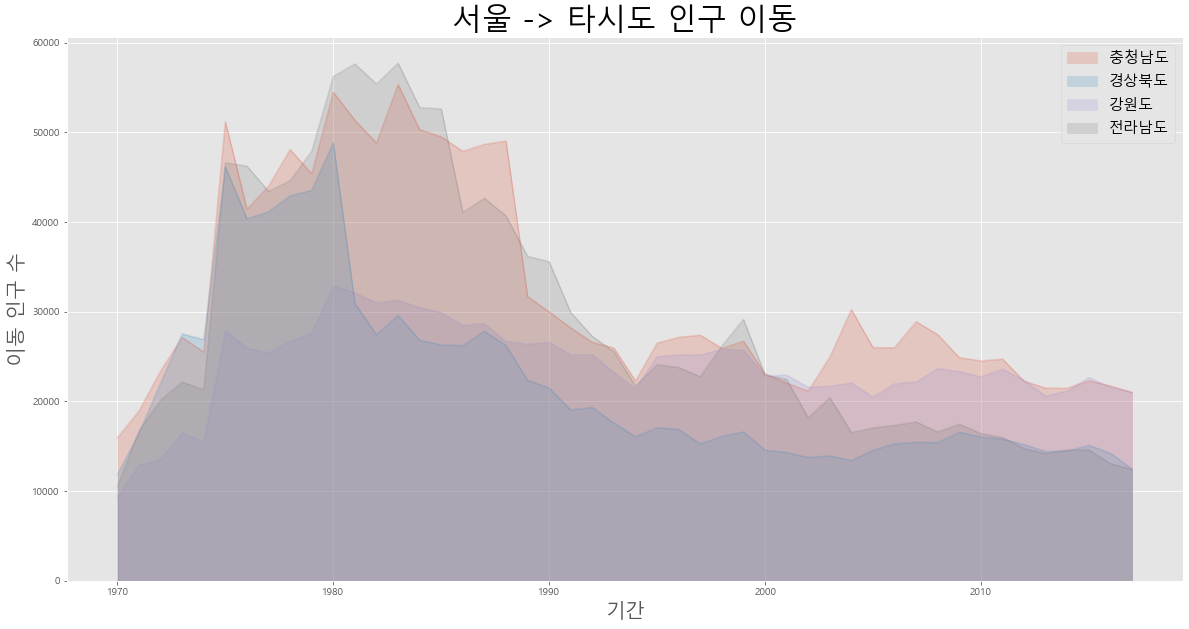

In [80]:
# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))
#stacked: 누적된, alpha: 투명도, figsize: 가로, 세로 인치
#stacked가 False이므로 각각 입력되어 겹쳐보임

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

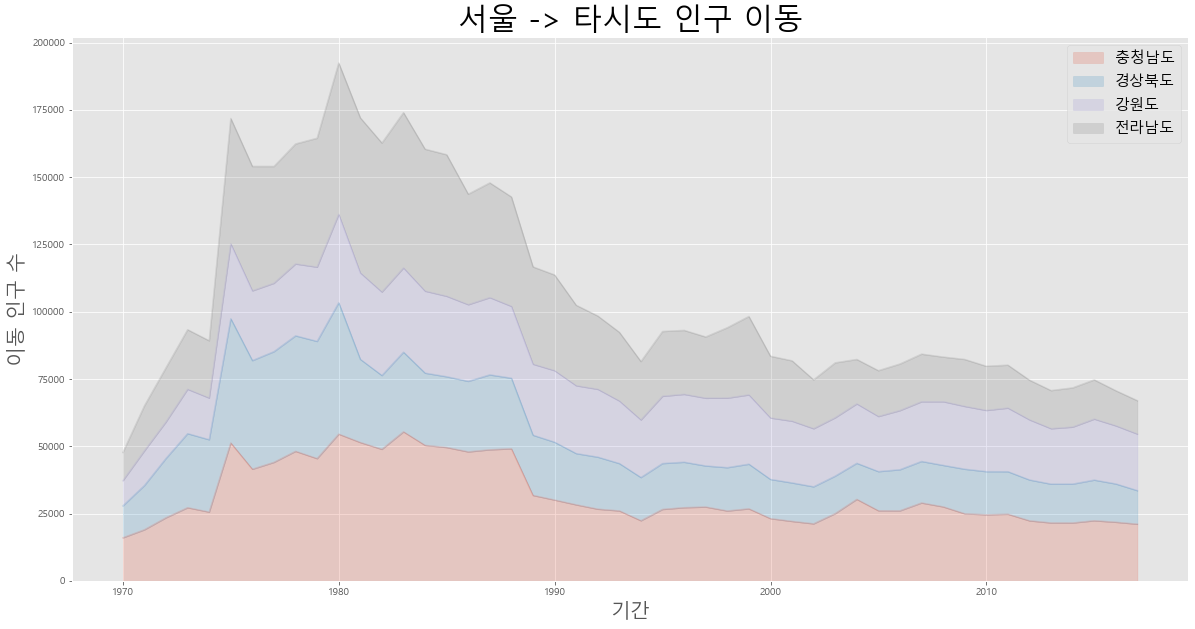

In [81]:
# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
#stacked: 누적된, alpha: 투명도, figsize: 가로, 세로 인치
#stacked가 True이므로 겹쳐보이지 않음

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

C:\Users\User\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


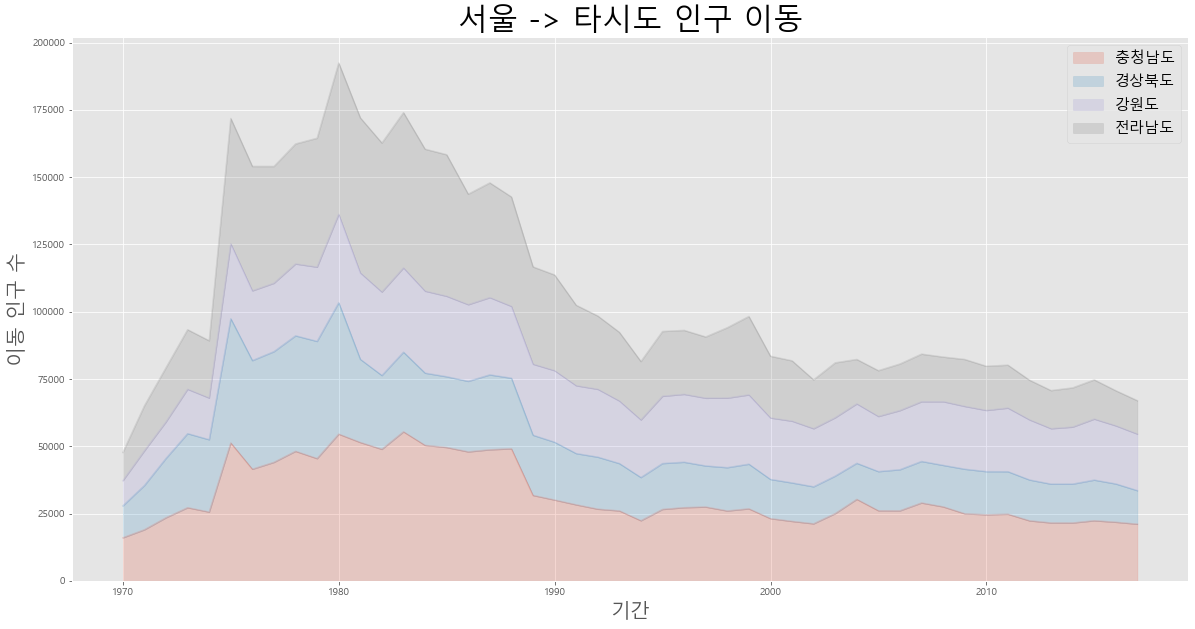

In [85]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

C:\Users\User\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<class 'matplotlib.axes._subplots.AxesSubplot'>


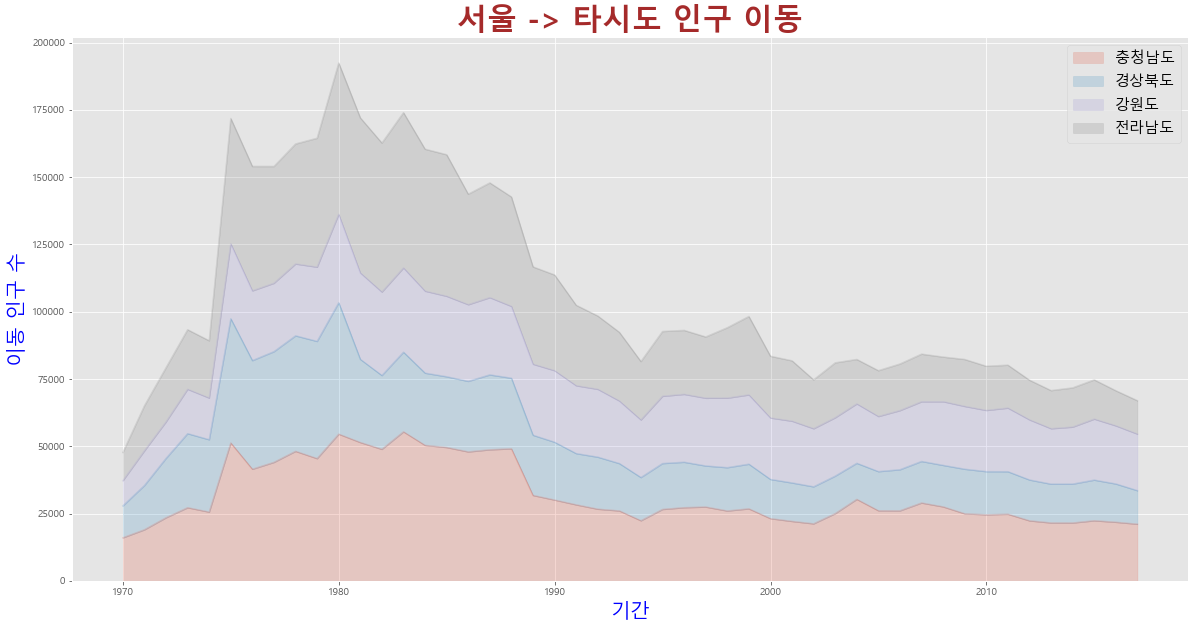

In [88]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 axe 객체 생성
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()